# Place Cell Formation
Following de Almeida paper

In [1]:
import vco
import numpy as np
import numpy.random as nprd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Initializing VCO matrix
numrow, numcol = 6, 12
ringsize = 12
minrho = 0.14
rotation_angle = 0
rhos = minrho * (np.sqrt(3)**(np.arange(numrow)))
thetas = np.pi + rotation_angle + 2*np.pi*(np.arange(numcol))/numcol
phz_noise = 0

VCOmat = [[vco.VCO_model(ringsize, rhos[i], thetas[j], phz_noise) \
           for j in range(numcol)] for i in range(numrow)]

In [3]:
def plot_many(things_to_plot):
    number = things_to_plot.shape[2]
    n_rc = int(np.ceil(np.sqrt(number)))
    n_plots = n_rc**2
    if n_plots > number:
        n_plots = number
    
    fig, axes = plt.subplots(nrows=n_rc, ncols=n_rc, sharex=True, sharey=True, figsize=(10,10))
    axes_list = [item for sublist in axes for item in sublist]

    for idx in range(n_plots):
        ax = axes_list.pop(0)
        ax.imshow(things_to_plot[:,:,idx],cmap='jet',extent=(-size,size,-size,size))
        ax.set_title(idx)
        ax.tick_params(
            which='both',
            bottom='off',
            left='off',
            right='off',
            top='off'
        )
        ax.spines['left'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)

    for ax in axes_list:
        ax.remove()

    plt.tight_layout()

## Creating size distribution of synapse size

In [4]:
def almeida_weights(size):
    A, B = 100.7, 0.02
    sigma = np.array([0.02, 0.018, 0.15])
    s = np.arange(0,0.2,0.0001)
    dist = A * (1 - np.exp(- s/sigma[0])) * (np.exp(- s/sigma[1]) + B * np.exp(- s/sigma[2]))
    pdf = dist/np.sum(dist)
    syn_diam = nprd.choice(s,size=size,p=pdf)
    weights = (syn_diam/0.2)*(syn_diam/(syn_diam+0.0314))
    return weights

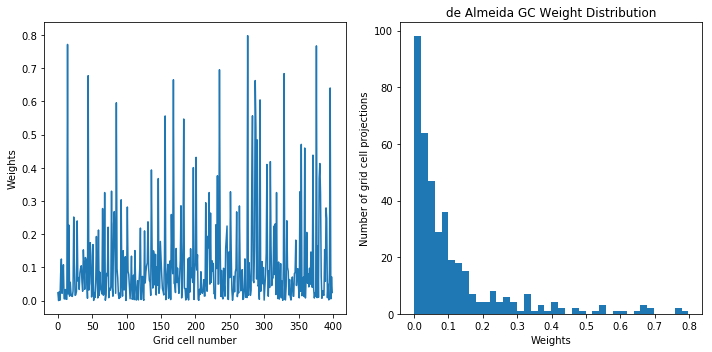

In [17]:
weights = almeida_weights(400)
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(weights)
plt.xlabel('Grid cell number')
plt.ylabel('Weights')
plt.subplot(122)
plt.hist(weights,bins=40)
plt.xlabel('Weights')
plt.ylabel('Number of grid cell projections')
plt.title('de Almeida GC Weight Distribution')
plt.tight_layout()

In [6]:
full_row = np.full([6,12,4*12**3], np.nan)
row = 4
jdx = 0
for firstcol in range(4):
    for cell1 in range(12):
        for cell2 in range(12):
            for cell3 in range(12):
                full_row[row,firstcol,  jdx] = cell1
                full_row[row,firstcol+4,jdx] = cell2
                full_row[row,firstcol+8,jdx] = cell3
                jdx = jdx + 1

In [7]:
partial_matrix = np.full([6,12,2*4*12**3], np.nan)
jdx = 0
for row in range(2,4):
    for firstcol in range(4):
        for cell1 in range(12):
            for cell2 in range(12):
                for cell3 in range(12):
                    partial_matrix[row,firstcol,  jdx] = cell1
                    partial_matrix[row,firstcol+4,jdx] = cell2
                    partial_matrix[row,firstcol+8,jdx] = cell3
                    jdx = jdx + 1

In [8]:
full_matrix = np.full([6,12,6*4*12**3], np.nan)
jdx = 0
for row in range(6):
    for firstcol in range(4):
        for cell1 in range(12):
            for cell2 in range(12):
                for cell3 in range(12):
                    full_matrix[row,firstcol,  jdx] = cell1
                    full_matrix[row,firstcol+4,jdx] = cell2
                    full_matrix[row,firstcol+8,jdx] = cell3
                    jdx = jdx + 1

In [9]:
grid_weights = partial_matrix

In [19]:
size = 5
num_grids = grid_weights.shape[2]

grid_outputs = np.zeros([10*size, 10*size, num_grids])
for gc in range(num_grids):
    grid_outputs[:,:,gc], _ = vco.theta_to_hcn(VCOmat,grid_weights[:,:,gc],size)

In [18]:
    place_cells[]
    out_max = np.max(place_cells[:,:,pc])
    out_thresh = place_cells[:,:,pc] - thresh*out_max
    out_thresh[out_thresh<0] = 0
    out_max  = np.max(out_thresh)
    
    place_cells[:,:,pc] = out_thresh/out_max


NameError: name 'place_cells' is not defined

In [20]:
num_places = 50
num_gc = 1500

place_cells = np.zeros([10*size, 10*size, num_places, 2])
weights = almeida_weights(num_gc)

for pc in range(num_places):
    idx = np.arange(num_grids)
    nprd.shuffle(idx)
    idx = idx[0:num_gc]
    for i, gc_ind in enumerate(idx):
        place_cells[:,:,pc,0] = place_cells[:,:,pc,0] + weights[i] * grid_outputs[:,:,gc_ind]  

In [21]:
k_thresh = 0.9
reset_val = np.amin(place_cells[:,:,:,0])
for pc in range(num_places):
    for x in range(place_cells.shape[0]):
        for y in range(place_cells.shape[1]):
            if place_cells[x,y,pc,0] >= k_thresh*np.max(place_cells[x,y,:,0]):
                place_cells[x,y,pc,1] = place_cells[x,y,pc,0]
            else:
                place_cells[x,y,pc,1] = reset_val

Place cells with 1500 grid cell inputs

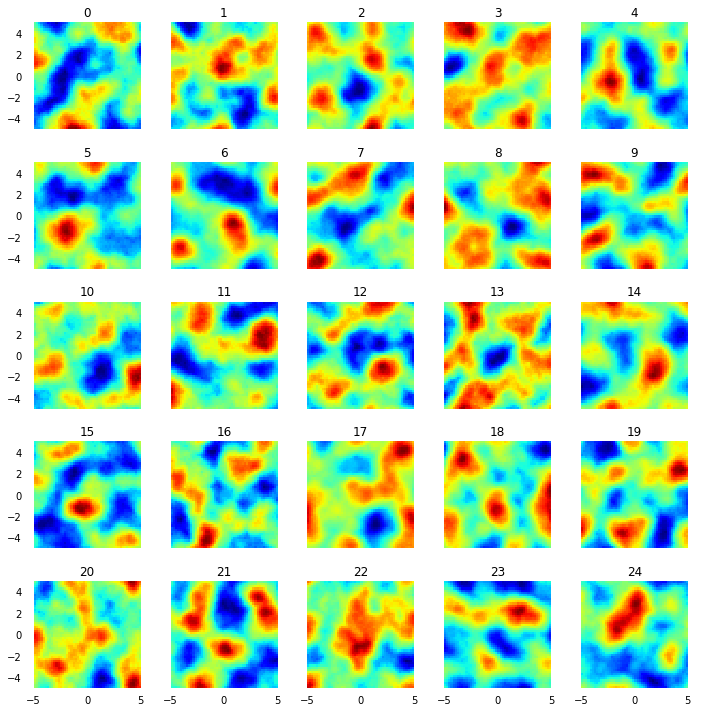

In [22]:
plot_many(place_cells[:,:,:25,0])

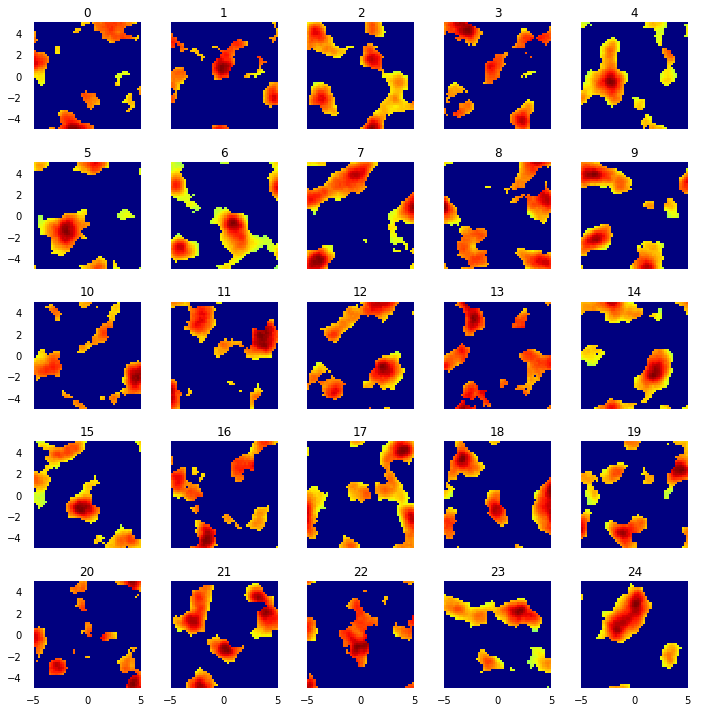

In [25]:
plot_many(place_cells[:,:,:25,1])

Stopped short of implementing E%-max, since it requires knowing the instantaneous activity of all cells (effectively the input to each place cell) to then adaptively threshold place cell firing at any time step. Is there a way to implement this in network dynamics?